In [ ]:
import yaml
with open(args.config_path, 'r', encoding='utf-8') as file:
    config = yaml.safe_load(file)

In [1]:
from utils.roi import ROIProcessor

video_path = "/root/audio-visual-forensics/data/FakeAVCeleb/RealVideo-RealAudio/African/men/id00076/00109.mp4"
model_path = "misc/face_landmarker.task"
landmarker = ROIProcessor(video_path, model_path)
R_means_dict, L_means_dict, M_means_dict, fps = landmarker.detect_with_calculate()

TypeError: string indices must be integers, not 'str'

In [49]:
from utils.ppg.ppg_c import PPG_C
from utils.ppg.ppg_g import PPG_G


R_ROI_G_PPG = PPG_G(R_means_dict, fps).compute_signal()
print("R_ROI_G_PPG: ", len(R_ROI_G_PPG))

R_ROI_C_PPG = PPG_C(R_means_dict, fps).compute_signal()
print("R_ROI_C_PPG: ", len(R_ROI_C_PPG))

L_ROI_G_PPG = PPG_G(L_means_dict, fps).compute_signal()
print("L_ROI_G_PPG: ", len(L_ROI_G_PPG))

L_ROI_C_PPG = PPG_C(L_means_dict, fps).compute_signal()
print("L_ROI_C_PPG: ", len(L_ROI_C_PPG))

M_ROI_G_PPG = PPG_G(M_means_dict, fps).compute_signal()
print("M_ROI_G_PPG: ", len(M_ROI_G_PPG))

M_ROI_C_PPG = PPG_C(M_means_dict, fps).compute_signal()
print("M_ROI_C_PPG: ", len(M_ROI_C_PPG))

R_ROI_G_PPG:  251
R_ROI_C_PPG:  251
L_ROI_G_PPG:  251
L_ROI_C_PPG:  251
M_ROI_G_PPG:  251
M_ROI_C_PPG:  251


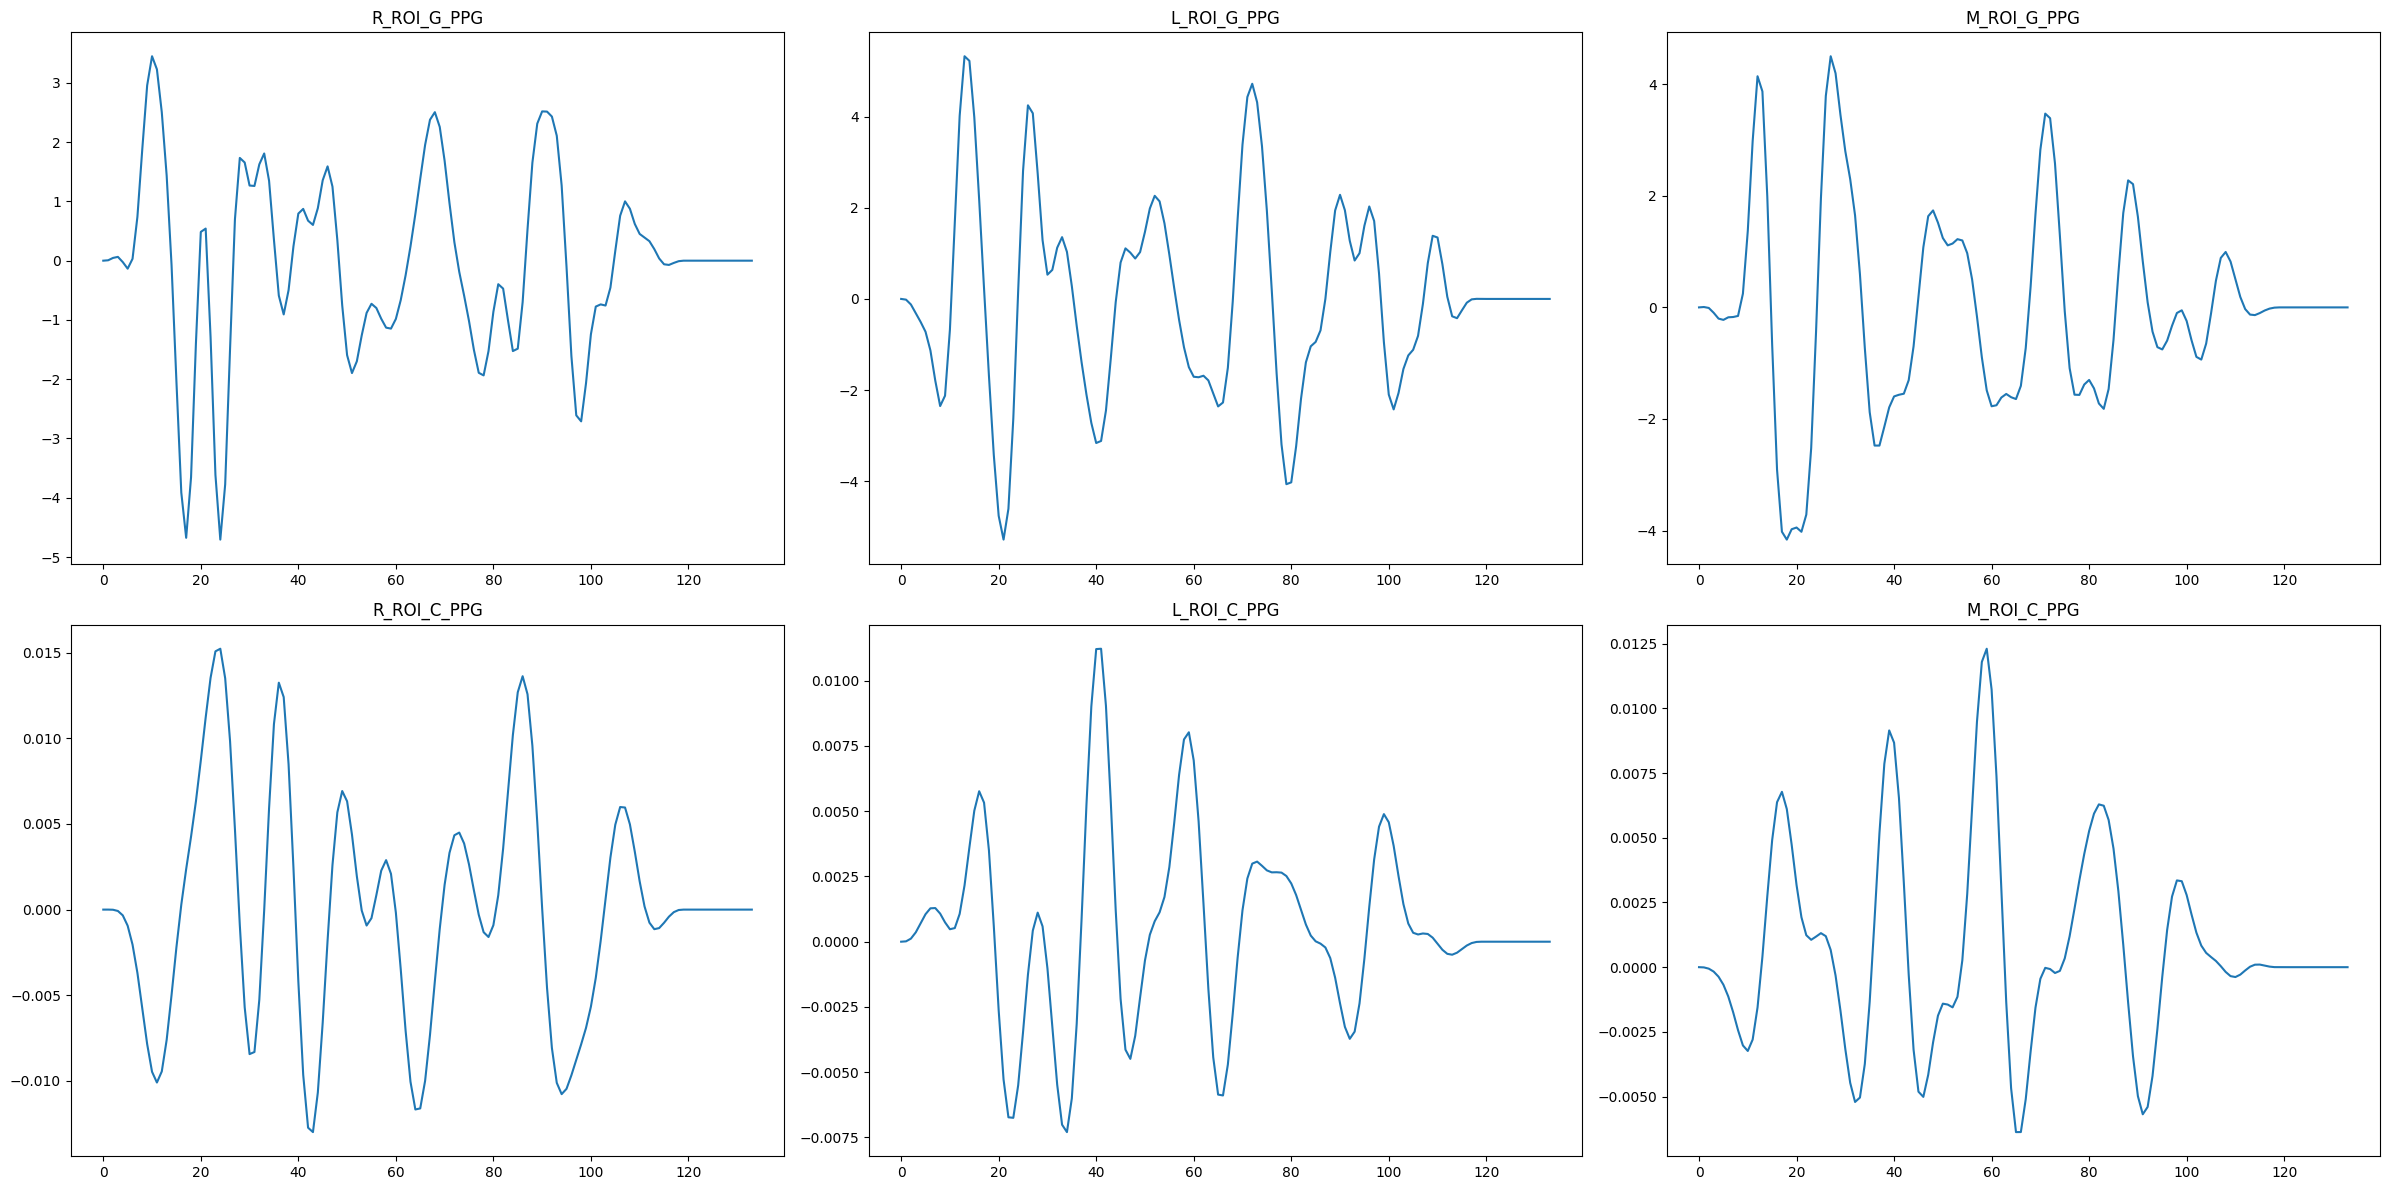

In [6]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots (2 rows and 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(24, 12))

# Plot data on the subplots
axs[0, 0].plot(R_ROI_G_PPG)
axs[0, 0].set_title('R_ROI_G_PPG')

axs[0, 1].plot(L_ROI_G_PPG)
axs[0, 1].set_title('L_ROI_G_PPG')

axs[0, 2].plot(M_ROI_G_PPG)
axs[0, 2].set_title('M_ROI_G_PPG')

axs[1, 0].plot(R_ROI_C_PPG)
axs[1, 0].set_title('R_ROI_C_PPG')

axs[1, 1].plot(L_ROI_C_PPG)
axs[1, 1].set_title('L_ROI_C_PPG')

axs[1, 2].plot(M_ROI_C_PPG)
axs[1, 2].set_title('M_ROI_C_PPG')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
import numpy as np
def split_segments(data, segment_length):
    """
    데이터를 segment_length 단위로 분할합니다. 
    남는 요소는 버립니다.
    
    Args:
        data (list or numpy.ndarray): 분할할 데이터.
        segment_length (int): 분할 크기.
        
    Returns:
        list: 분할된 세그먼트 리스트.
    """
    # 유효한 길이를 segment_length의 배수로 제한
    valid_length = len(data) - (len(data) % segment_length)
    return [np.array(data[i:i + segment_length]) for i in range(0, valid_length, segment_length)]


In [9]:
def combine_segments(*segments):
    """
    여러 세그먼트를 같은 인덱스 기준으로 묶습니다.

    Args:
        segments (list of lists): 여러 세그먼트 리스트.
    
    Returns:
        list of tuples: 인덱스별로 묶인 세그먼트 튜플 리스트.
    """
    return list(zip(*segments))

In [20]:
len(R_ROI_G_PPG)

134

In [30]:
R_ROI_G_segments = split_segments(R_ROI_G_PPG, 50)
R_ROI_C_segments = split_segments(R_ROI_C_PPG, 50)
L_ROI_G_segments = split_segments(L_ROI_G_PPG, 50)
L_ROI_C_segments = split_segments(L_ROI_C_PPG, 50)
M_ROI_G_segments = split_segments(M_ROI_G_PPG, 50)
M_ROI_C_segments = split_segments(M_ROI_C_PPG, 50)

len(R_ROI_G_segments)

2

In [22]:
fps

25

In [1]:
# 각 세그먼트 리스트를 결합
combined_segments = combine_segments(
    R_ROI_G_segments, 
    R_ROI_C_segments, 
    L_ROI_G_segments, 
    L_ROI_C_segments, 
    M_ROI_G_segments, 
    M_ROI_C_segments
)

# 첫 번째 묶인 결과 출력

print("첫 번째 묶인 세그먼트:", len(combined_segments[0]))
combined_segments[0].shape

NameError: name 'combine_segments' is not defined

In [38]:
from utils.feature.feature_extractor import FeatureExtractor

features = []
for ppg in combined_segments:
    fe = FeatureExtractor(fps, *ppg)
    feature = fe.feature_union()
    features.append(feature)
    print(feature)
features = np.array(features)

print("NAN: ", np.any(np.isinf(features)))

[ 4.90349685e-21  4.71336257e-18  4.90119786e-21  2.53848927e-20
  3.32677136e-17  2.54281776e-20  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  7.00000000e+00  7.00000000e+00  9.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  7.00000000e+00  7.00000000e+00  9.00000000e+00
  4.29453747e+02  4.29453747e+02  4.29453747e+02  4.29453747e+02
  4.29453747e+02  4.29453747e+02  2.85679084e-01  2.85929790e-01
  3.53255541e-01  2.14726873e+04  2.14726873e+04  2.14726873e+04
  2.14726873e+04  2.14726873e+04  2.14726873e+04  3.41087847e+00
  2.82475210e+00  3.41718438e+00  1.90783116e-09  2.48033365e-09
  7.91490059e-12  4.51001588e-12  3.80427968e-12  2.38424894e-09
  2.60993428e-01  2.37476403e-01  2.61234928e-01  4.09920986e-10
  3.47796458e-10  6.39488462e-14  1.40343433e-13  4.97379915e-13
  6.00138605e-10  1.10304575e-02  2.24091614e-02  1.09922474e-02
  3.77434262e-09  2.81310

In [39]:
labels = np.zeros(features.shape[0], dtype=int)
labels

array([0, 0])

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [44]:
X_train[0].shape

(117,)

In [45]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(features, labels)

SVR()

In [43]:
def majority_voting(probabilities):
    """
    Perform majority voting on the predicted probabilities.
    """
    mean_prob = np.mean(probabilities)
    majority_vote = np.round(mean_prob)
    return majority_vote

In [46]:
segment_probabilities = []

for feature in features:
    prob = svr.predict([feature])[0]  # SVR 모델로 예측
    segment_probabilities.append(prob)

video_label = majority_voting(segment_probabilities)

print("Segment Probabilities:", segment_probabilities)
print("Final Video Label:", video_label)

Segment Probabilities: [0.0, 0.0]
Final Video Label: 0.0
